In [1]:
from collections import defaultdict
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# vscode has a bug with tqdm.notebook
# https://github.com/microsoft/vscode-jupyter/issues/9397
from tqdm import tqdm
from pymatgen.io.vasp.outputs import Vasprun

In [2]:
# Mount with ratarmount
folder = Path("../datasets/raw_vasp/dichalcogenides8x8_vasp_nus_202110/MoS2_8x8_5933")

In [3]:
data = defaultdict(dict)
for vasp_folder in tqdm(folder.glob(r"poscar_*")):
    vasprun_file = Vasprun(vasp_folder / "01_relax" / "vasprun.xml",
                           parse_potcar_file=False,
                           separate_spins=False,
                           parse_dos=True)
    data[vasp_folder.name]['eigenvalue_band_properties'], _, _, _ = \
        vasprun_file.eigenvalue_band_properties
    data[vasp_folder.name]['get_band_structure'] = \
         vasprun_file.get_band_structure().get_band_gap()['energy']

5933it [45:26,  2.18it/s]


In [4]:
differences = np.diff(pd.DataFrame.from_dict(data, orient='index').values, axis=1)

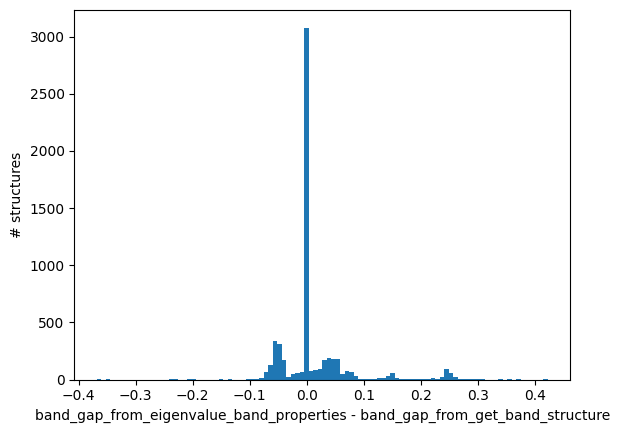

In [5]:
fig, ax = plt.subplots()
ax.hist(differences, bins=100);
ax.set_xlabel("band_gap_from_eigenvalue_band_properties - band_gap_from_get_band_structure")
ax.set_ylabel("# structures");